<a href="https://colab.research.google.com/github/rajusuthar/Python-Assignment/blob/main/Airbnb_Booking_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

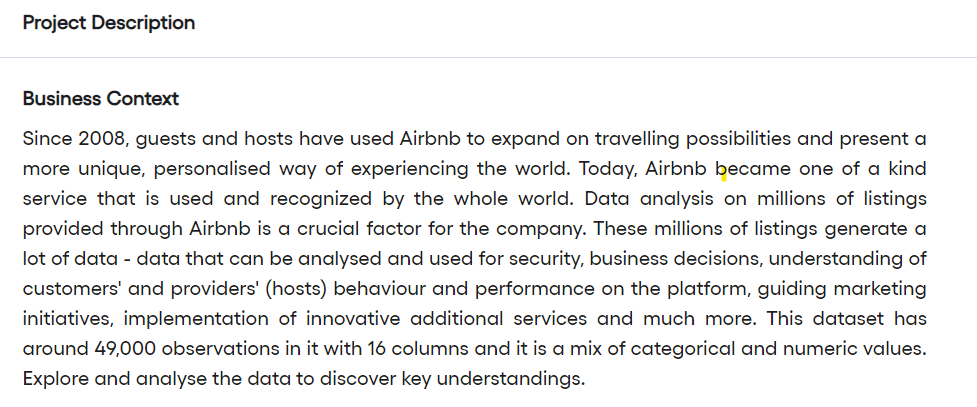

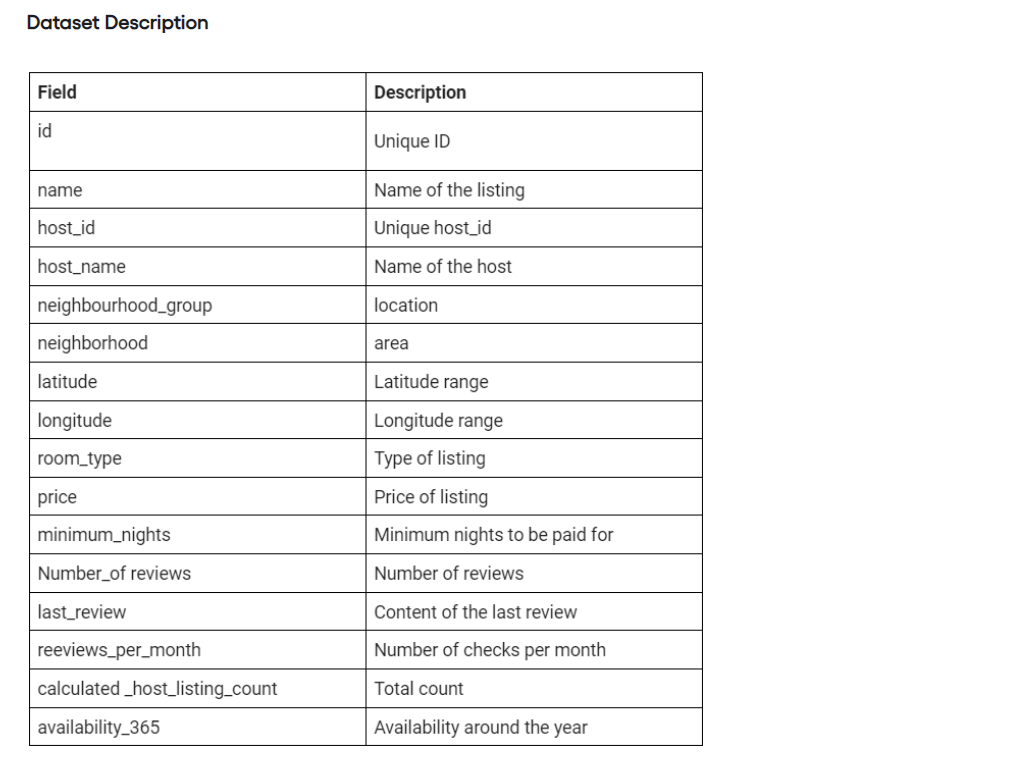

##Let's Start the analytics of hotel booking on Airbnb booking Dataset.

In [2]:
#importting the libarary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
#path of Dataset
dir_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'

In [4]:
#reading dataset through pandas read_csv
airbnb_df = pd.read_csv(dir_path)

In [5]:
#let's check the shape of our dataset
airbnb_df.shape

(48895, 16)

##Our Dataset contain 49K record and have 16 columns

In [4]:
#lets see the data first
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


##Let's get a bit deeper and check more information about each column

In [6]:
#checking info about dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##As we can seen that we have null values only in two columns (last review and reviews per month).as we go ahead we will replace those null values with relavent other values as per business.

##Let's see the descriptive summary of our data


In [7]:
#checking descriptive summary
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#From the descriptive summary of our data , we can check summary like mean , median , maximum value and minimum value of numrecial column

In [12]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##Before Start let's replace null value with relevent values

##To replace null value in categorical columns we use mode, with the assumption that if any value occured maximum number of time in column then null value can be replaced with that value.

#To replace null value in Numerical column we use median, we can also use mean but mean is effected by outlier but median not.

In [30]:
#replacing name column null value with mode
airbnb_df['name'].fillna('Hillside Hotel',inplace=True)

#replacing host name column null value with mode
airbnb_df['host_name'].fillna('Michael',inplace=True)

#replacing review_per_month column null with median
review_per_month_median = airbnb_df[~airbnb_df['reviews_per_month'].isnull()]['reviews_per_month'].median()
airbnb_df['reviews_per_month'].fillna(review_per_month_median,inplace=True)

##Availibility_365 define as number of days hotels available of book, so it should not contain value more than 365 or zero , if it is present than we will replace those value with mean.


In [59]:
#Replacing zero with mean in availbility_365 column
airbnb_df['availability_365'].replace(0,112,inplace=True)

##We will not use Last_review column in our analysis so let's drop that column.

In [32]:
#dropping last_review column
airbnb_df.drop('last_review',axis=1,inplace=True)

##Till now we have done cleaning of our dataset, now let's see info again then we will start analytics

In [60]:
#checking info of our data
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [61]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


## 1. How many Host are there with each neighbourhood_group

In [85]:
airbnb_df.groupby(['neighbourhood_group'])['host_name'].count().reset_index().rename(columns={'host_name':'number of host per neighbouring group'}).sort_values(by='number of host per neighbouring group')

,neighbourhood_group,number of host per neighbouring group
4,Staten Island,373
0,Bronx,1091
3,Queens,5666
1,Brooklyn,20104
2,Manhattan,21661


#From this analysis we can observe that Manhattan(neighbourhood_group) has heighest number of host , while Staten Island (neighbourhood_group) has lowest number of host.

In [1]:
airbnb_df.groupby(['neighbourhood_group','room_type'])['room_type'].count()

NameError: ignored